# ***Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np

from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


# ***Loading Dataset***

In [261]:
df = pd.read_csv("/content/twitter_training.csv")
df.head(10)

2401  ... im getting on borderlands and i will murder you all ,
0  2401  ...  I am coming to the borders and I will kill you...   
1  2401  ...  im getting on borderlands and i will kill you ...   
2  2401  ...  im coming on borderlands and i will murder you...   
3  2401  ...  im getting on borderlands 2 and i will murder ...   
4  2401  ...  im getting into borderlands and i can murder y...   
5  2402  ...  So I spent a few hours making something for fu...   
6  2402  ...  So I spent a couple of hours doing something f...   
7  2402  ...  So I spent a few hours doing something for fun...   
8  2402  ...  So I spent a few hours making something for fu...   
9  2402  ...  2010 So I spent a few hours making something f...   

[10 rows x 4 columns]

In [262]:
df.rename(columns={'im getting on borderlands and i will murder you all ,':'tweet','Positive':'label'},inplace=True)

# ***Exploratory Data Analysis***

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   2401         74681 non-null  int64 
 1   Borderlands  74681 non-null  object
 2   label        74681 non-null  object
 3   tweet        73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [264]:
df.isnull().sum()

2401             0
Borderlands      0
label            0
tweet          686
dtype: int64

In [265]:
df.dropna(subset=['tweet'],inplace=True)

In [266]:
df.isnull().sum()

2401           0
Borderlands    0
label          0
tweet          0
dtype: int64

In [267]:
df['2401'].value_counts()

5203     6
6104     6
6093     6
6095     6
6097     6
        ..
9341     3
11668    3
8164     3
9490     3
12825    3
Name: 2401, Length: 12447, dtype: int64

In [268]:
df['Borderlands'].value_counts()

MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                       

In [269]:
df['label'].value_counts()

Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: label, dtype: int64

In [270]:
df.replace({"Negative":0,"Positive":1,"Neutral":2,"Irrelevant":3},inplace=True)

* **Negative** - 0
* **Positive** - 1
* **Neutral** - 2
* **Irrelevant** - 3




In [271]:
df['label'].value_counts()

0    22358
1    20654
2    18108
3    12875
Name: label, dtype: int64

In [272]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:   73995


# ***Feature Visualization***

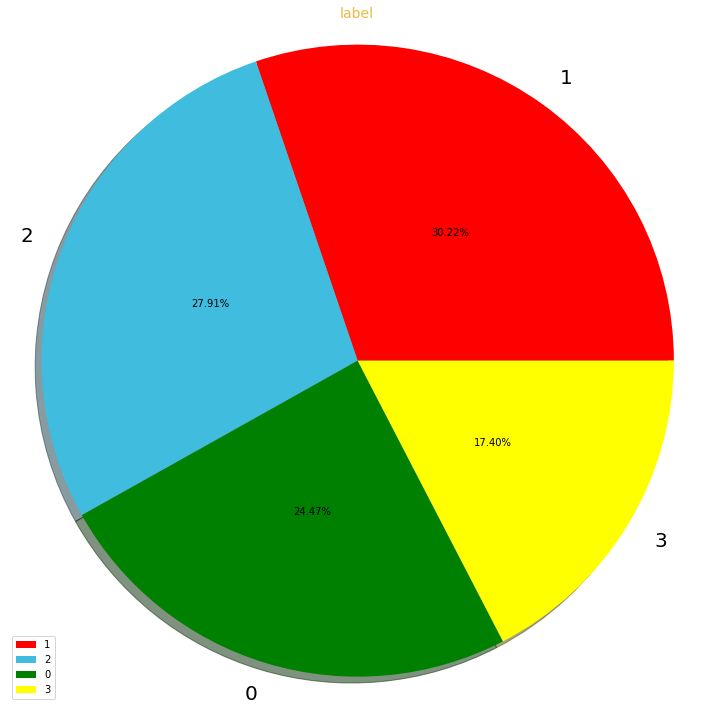

In [273]:
def PieChartplotter(df,columnname):
  values = df[columnname].value_counts()
  labels = df[columnname].unique()
  pie,ax = plt.subplots(figsize=[10,10])
  patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,colors = ['red','#40bcde','green','yellow'])
  plt.legend(patches, labels, loc="best")
  plt.title(columnname,color='#e8bb48', fontsize=14)
  plt.setp(texts, fontsize=20)
  plt.setp(autotexts, size=10, color='black')
  autotexts[1].set_color('black')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

PieChartplotter(df,"label")

# ***Data Preprocessing***

In [274]:
df.drop(['2401','Borderlands'],axis=1,inplace=True)

In [275]:
df_neg=df[df['label']==0]
df_pos=df[df['label']==1]
df_neu=df[df['label']==2]
df_irr=df[df['label']==3]

In [276]:
''' Turning all the tweets into lower case to minimise the difference of ASCII 
value between characters'''
df['tweet'] = df['tweet'].str.lower()
df.head()

label                                              tweet
0      1  i am coming to the borders and i will kill you...
1      1  im getting on borderlands and i will kill you ...
2      1  im coming on borderlands and i will murder you...
3      1  im getting on borderlands 2 and i will murder ...
4      1  im getting into borderlands and i can murder y...

In [277]:
# Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [278]:
def cleaning_stopwords(text):
  return ' '.join([word for word in str(text).split() if word not in stop_words])

df['tweet'] = df['tweet'].apply(lambda x: cleaning_stopwords(x))
df['tweet'].head()

0                coming borders kill all,
1        im getting borderlands kill all,
2       im coming borderlands murder all,
3    im getting borderlands 2 murder all,
4      im getting borderlands murder all,
Name: tweet, dtype: object

In [279]:
# removing punctuations

!pip install string
import string

eng_punc = string.punctuation
punctuations_list = eng_punc

def cleaning_punctuations(text):
  translator = str.maketrans('', '', punctuations_list)
  return text.translate(translator)

df['tweet'] = df['tweet'].apply(lambda x: cleaning_punctuations(x))
df['tweet'].head()

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


0                coming borders kill all
1        im getting borderlands kill all
2       im coming borderlands murder all
3    im getting borderlands 2 murder all
4      im getting borderlands murder all
Name: tweet, dtype: object

In [280]:
# removing repeating characters
import re
def cleaning_repeating_char(text):
  return re.sub(r'(.)1+', r'1', text)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_repeating_char(x))
df['tweet'].head()

0                coming borders kill all
1        im getting borderlands kill all
2       im coming borderlands murder all
3    im getting borderlands 2 murder all
4      im getting borderlands murder all
Name: tweet, dtype: object

In [281]:
# removing URLS
def cleaning_URLs(df):
  return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',df)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_URLs(x))
df['tweet'].head()

0                coming borders kill all
1        im getting borderlands kill all
2       im coming borderlands murder all
3    im getting borderlands 2 murder all
4      im getting borderlands murder all
Name: tweet, dtype: object

In [282]:
# removing numericals
def cleaning_numericals(df):
  return re.sub('[0-9]+',' ',df)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_numericals(x))
df['tweet'].head()

0                coming borders kill all
1        im getting borderlands kill all
2       im coming borderlands murder all
3    im getting borderlands   murder all
4      im getting borderlands murder all
Name: tweet, dtype: object

In [283]:
# removing special characters
def cleaning_sc(df):
  return re.sub('[^a-zA-Z0-9]',' ',df)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_sc(x))
df['tweet'].head()

0                coming borders kill all
1        im getting borderlands kill all
2       im coming borderlands murder all
3    im getting borderlands   murder all
4      im getting borderlands murder all
Name: tweet, dtype: object

In [284]:
# Tokenizing tweets
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['tweet'] = df['tweet'].apply(lambda x:word_tokenize(x))
df['tweet'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0               [coming, borders, kill, all]
1      [im, getting, borderlands, kill, all]
2     [im, coming, borderlands, murder, all]
3    [im, getting, borderlands, murder, all]
4    [im, getting, borderlands, murder, all]
Name: tweet, dtype: object

In [285]:
# Applying Stemming
st = nltk.PorterStemmer()
def stem(text):
  t = [st.stem(word) for word in text ]
  return text
df['tweet'] = df['tweet'].apply(lambda x: stem(x))
df.head()

label                                    tweet
0      1             [coming, borders, kill, all]
1      1    [im, getting, borderlands, kill, all]
2      1   [im, coming, borderlands, murder, all]
3      1  [im, getting, borderlands, murder, all]
4      1  [im, getting, borderlands, murder, all]

In [286]:
# Applying Lemmatizer
import nltk
nltk.download('wordnet')
lm = WordNetLemmatizer()
def lem(text):
  t = [lm.lemmatize(word) for word in text ]
  return text
df['tweet'] = df['tweet'].apply(lambda x: lem(x))
df['tweet'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0               [coming, borders, kill, all]
1      [im, getting, borderlands, kill, all]
2     [im, coming, borderlands, murder, all]
3    [im, getting, borderlands, murder, all]
4    [im, getting, borderlands, murder, all]
Name: tweet, dtype: object

In [287]:
df.tail()

label                                              tweet
74676      1  [realized, windows, partition, mac, like, year...
74677      1  [realized, mac, window, partition, years, behi...
74678      1  [realized, windows, partition, mac, years, beh...
74679      1  [realized, windows, partition, mac, like, year...
74680      1  [like, windows, partition, mac, like, years, b...

In [288]:
x=df.tweet
y=df.label

***Word cloud for positive tweets***

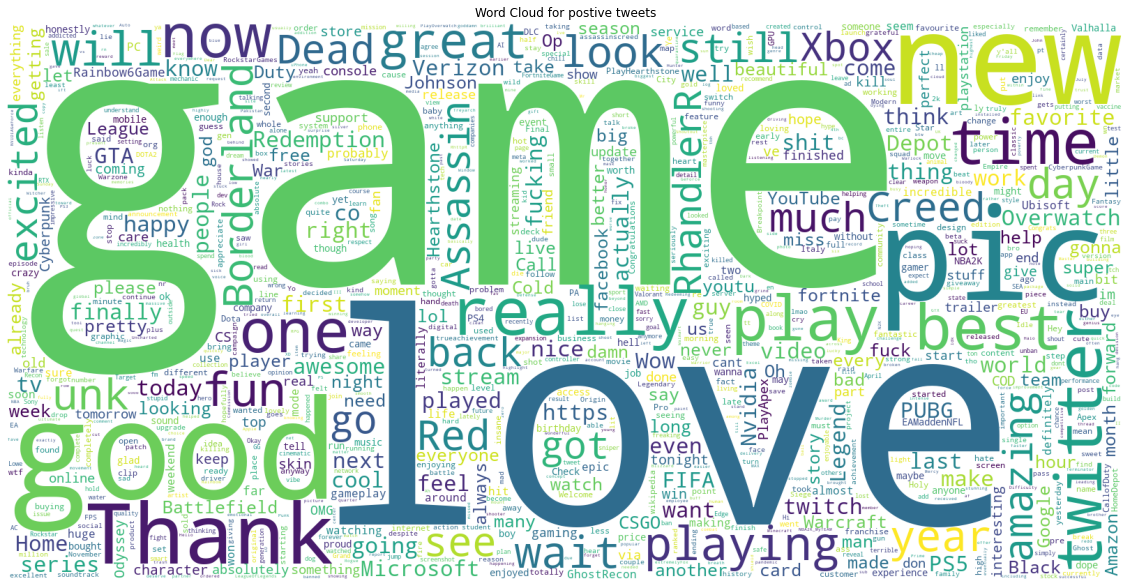

In [289]:
wc = WordCloud(background_color='white',max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(str(v) for v in df_pos['tweet']))
plt.figure(figsize = (20,20))
plt.title('Word Cloud for postive tweets')
plt.axis('off')
plt.imshow(wc)

***Word cloud for negative tweets***

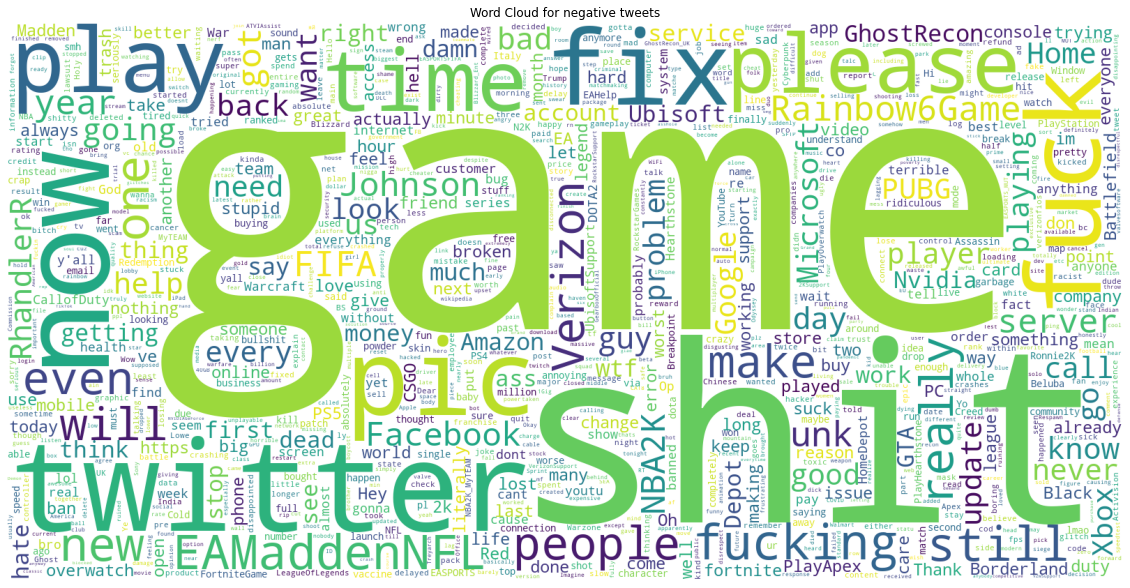

In [290]:
wc = WordCloud(background_color='white',max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(str(v) for v in df_neg['tweet']))
plt.figure(figsize = (20,20))
plt.title('Word Cloud for negative tweets')
plt.axis('off')
plt.imshow(wc)

***Word cloud for neutral tweets***

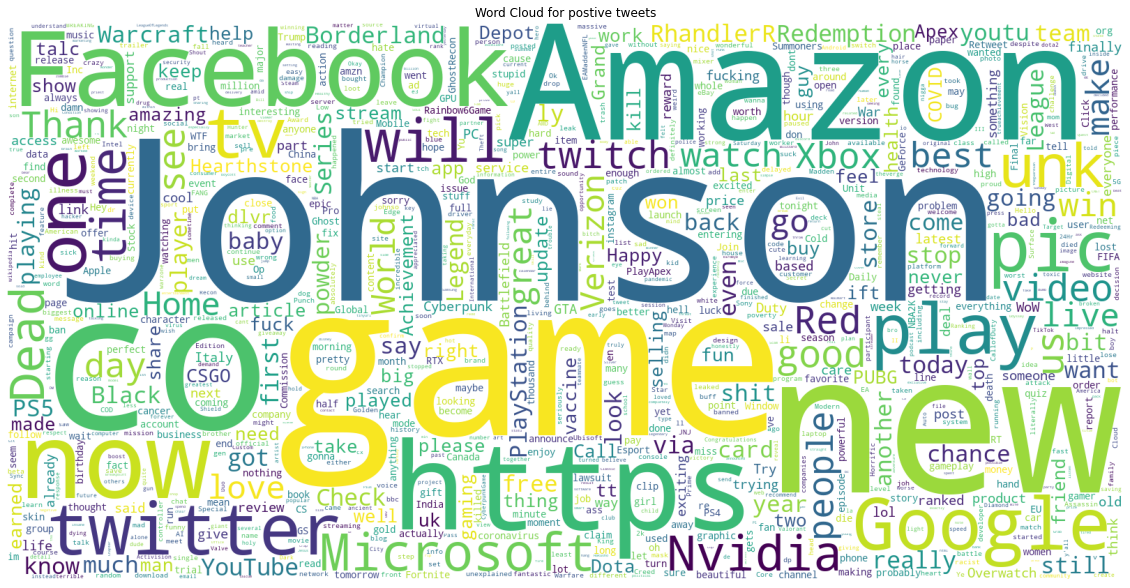

In [291]:
wc = WordCloud(background_color='white',max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(str(v) for v in df_neu['tweet']))
plt.figure(figsize = (20,20))
plt.title('Word Cloud for postive tweets')
plt.axis('off')
plt.imshow(wc)

***Word cloud for irrelevant tweets***

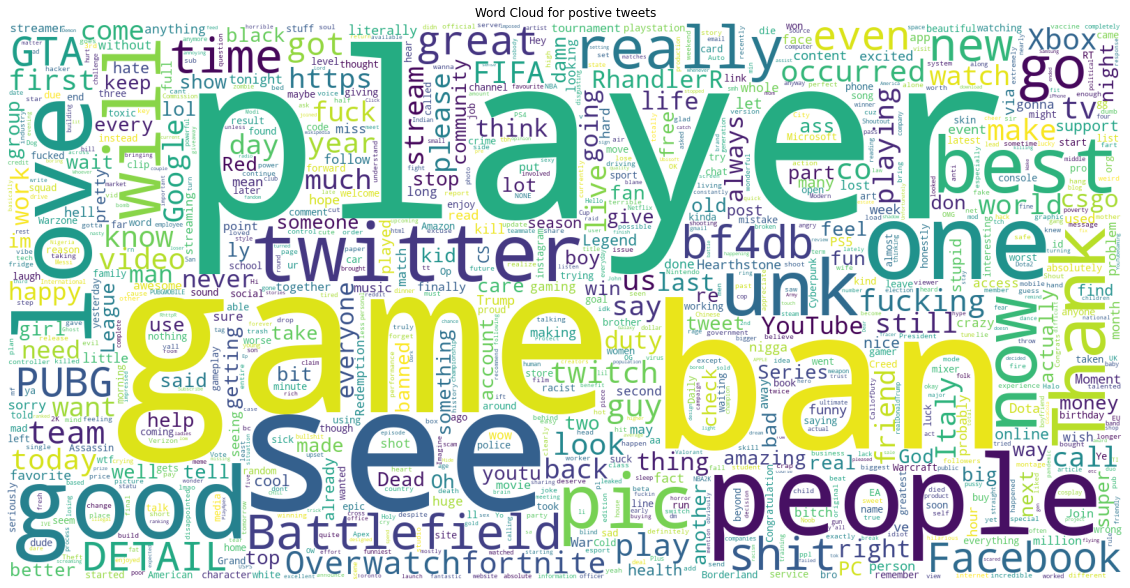

In [292]:
wc = WordCloud(background_color='white',max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(str(v) for v in df_irr['tweet']))
plt.figure(figsize = (20,20))
plt.title('Word Cloud for postive tweets')
plt.axis('off')
plt.imshow(wc)

In [293]:
# Separating the 80% data for training data and 20% for testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =26)

#***Transform the data using TF-IDF Vectorizer***




---


TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [295]:
x_train=x_train.apply(lambda x: ' '.join(x))
x_test=x_test.apply(lambda x: ' '.join(x))

In [296]:
vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=500000)
vectoriser.fit(x_train)
print('No. of feature words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  35239


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [297]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

# ***Function for model Evaluation***

In [304]:
predicte=[]
def model_evaluate(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(model)
  print(classification_report(y_test,y_pred))
  predicte.append(accuracy_score(y_test,y_pred))
  

# ***Building Models***

In [305]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'AdaBoostClassifier': GradientBoostingClassifier(random_state=20),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'GradientBoostingClassifier': AdaBoostClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'XGBClassifier': XGBClassifier()}

In [306]:
# Logistic Regression
model_evaluate(value[0])

LogisticRegression()
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4450
           1       0.78      0.80      0.79      4122
           2       0.74      0.75      0.75      3676
           3       0.81      0.67      0.74      2551

    accuracy                           0.78     14799
   macro avg       0.78      0.77      0.77     14799
weighted avg       0.78      0.78      0.78     14799



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [307]:
# KNN Neighbors
model_evaluate(value[1])

KNeighborsClassifier(n_neighbors=2)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4450
           1       0.78      0.96      0.86      4122
           2       0.96      0.84      0.90      3676
           3       0.99      0.83      0.90      2551

    accuracy                           0.90     14799
   macro avg       0.92      0.89      0.90     14799
weighted avg       0.91      0.90      0.90     14799



In [308]:
# Decisoin Tree
model_evaluate(value[2])

DecisionTreeClassifier(random_state=10)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4450
           1       0.80      0.79      0.80      4122
           2       0.73      0.79      0.76      3676
           3       0.78      0.70      0.74      2551

    accuracy                           0.79     14799
   macro avg       0.79      0.78      0.78     14799
weighted avg       0.79      0.79      0.79     14799



In [309]:
# Random Forest Classifier
model_evaluate(value[3])

RandomForestClassifier(n_estimators=60, random_state=0)
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4450
           1       0.90      0.91      0.90      4122
           2       0.85      0.92      0.88      3676
           3       0.97      0.83      0.89      2551

    accuracy                           0.90     14799
   macro avg       0.91      0.90      0.90     14799
weighted avg       0.90      0.90      0.90     14799



In [310]:
# Adaboost Classifier
model_evaluate(value[4])

GradientBoostingClassifier(random_state=20)
              precision    recall  f1-score   support

           0       0.46      0.81      0.59      4450
           1       0.58      0.56      0.57      4122
           2       0.61      0.40      0.48      3676
           3       0.70      0.15      0.25      2551

    accuracy                           0.53     14799
   macro avg       0.59      0.48      0.47     14799
weighted avg       0.57      0.53      0.50     14799



In [311]:
# Gradient Boosting Classifier
model_evaluate(value[5])

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.40      0.81      0.53      4450
           1       0.57      0.43      0.49      4122
           2       0.52      0.29      0.37      3676
           3       0.48      0.09      0.16      2551

    accuracy                           0.45     14799
   macro avg       0.49      0.41      0.39     14799
weighted avg       0.49      0.45      0.42     14799



In [312]:
# XGB Classifier
model_evaluate(value[6])

XGBClassifier(objective='multi:softprob')
              precision    recall  f1-score   support

           0       0.44      0.83      0.57      4450
           1       0.58      0.54      0.56      4122
           2       0.62      0.36      0.45      3676
           3       0.65      0.11      0.19      2551

    accuracy                           0.51     14799
   macro avg       0.57      0.46      0.44     14799
weighted avg       0.56      0.51      0.47     14799



In [313]:
mod = pd.DataFrame({'Models':key,'Accuracies' : predicte})
mod

Models  Accuracies
0          LogisticRegression    0.777958
1        KNeighborsClassifier    0.898169
2      DecisionTreeClassifier    0.787215
3      RandomForestClassifier    0.902223
4          AdaBoostClassifier    0.525576
5  GradientBoostingClassifier    0.451922
6               XGBClassifier    0.507264

In [314]:
print('Random Forst Classifier: ',predicte[3]*100)

Random Forst Classifier:  90.22231231839989


We can see that Random Forst Classifier has highest accuracy among others

# ***Testing with twitter_validation.csv***

In [320]:
test=pd.read_csv('/content/twitter_validation.csv')
test.head()

3364  ... I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣
0   352  ...  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                
1  8312  ...  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                
2  4371  ...  CSGO matchmaking is so full of closet hacking,...                                                                                                                                                                                                
3  4433  ...  Now the President is slapping Americans in the...                                                                                                                                                                                                
4  6273  ...  Hi @EAHelp I’ve had Madeleine McCann in my cel...                                                                                                                                                                                                

[5 rows x 4 columns]

In [322]:
rc=value[3]
rc

RandomForestClassifier(n_estimators=60, random_state=0)

In [323]:
test.rename(columns={'Irrelevant':'label','I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣':'tweet'},inplace=True)

In [324]:
test.isnull().sum()

3364        0
Facebook    0
label       0
tweet       0
dtype: int64

In [327]:
test.drop(['3364','Facebook'],axis=1,inplace=True)

In [329]:
test.replace({"Negative":0,"Positive":1,"Neutral":2,"Irrelevant":3},inplace=True)

In [330]:
x=test.tweet
y=test.label

In [332]:
test['tweet'] = test['tweet'].str.lower()
test['tweet'] = test['tweet'].apply(lambda x: cleaning_stopwords(x))
test['tweet'] = test['tweet'].apply(lambda x: cleaning_punctuations(x))
test['tweet'] = test['tweet'].apply(lambda x: cleaning_repeating_char(x))
test['tweet'] = test['tweet'].apply(lambda x: cleaning_URLs(x))
test['tweet'] = test['tweet'].apply(lambda x: cleaning_numericals(x))
test['tweet'] = test['tweet'].apply(lambda x: cleaning_sc(x))
test['tweet'] = test['tweet'].apply(lambda x:word_tokenize(x))
test['tweet'] = test['tweet'].apply(lambda x: stem(x))
test['tweet'] = test['tweet'].apply(lambda x: lem(x))

In [333]:
x=x.apply(lambda x: ' '.join(x))

In [337]:
x=vectoriser.transform(x)

In [339]:
test_pred=rc.predict(x)

In [343]:
print("Accuracy is: ",accuracy_score(test_pred,y)*100)

Accuracy is:  96.7967967967968
